*This workshop was inspired by a workshop created by Antonio Nanni (non87 on GitHub) for NUIT Research Computing Services in 2020. Thanks, Antonio!*

# Intro to Matplotlib

Matplotlib is the Python package for creating custom data visualizations. It can make very complicated, beautiful visualizations, including interactive and animated visualizations. Check out https://matplotlib.org/stable/gallery/index.html for hundreds of examples.
<br><br>The potential complexity of graphs you can make means that Matplotlib is a very large package! Today we only have an hour and a half, so we're going to cover the fundamental concepts that will hopefully make this complicated package easier for you to work with.

## <br><br>The Backend

The **frontend** is the code that you write to create a plot. The **backend** is the code behind the scenes that is translating your code into a visualization. Matplotlib has multiple backends that you can use - some are better at creating **hard** image files (for example, png, jpg, pdf files) and some are better at creating **interactive** visualizations. Some backends are also better for working in Jupyter notebooks or better in scripts.
<br><br>Matplotlib will usually choose an appropriate backend for you. Let's import Matplotlib and see which backend it chose for us.

In [1]:
import matplotlib
matplotlib.get_backend()

'module://matplotlib_inline.backend_inline'

<br>Matplotlib chose the **inline** backend for me. This is the best backend for visualizing plots in Jupyter notebooks (and Jupyter notebooks are pretty much the best for customizing your plots!). Sometimes your setup might not choose the right backend for your Jupyter notebook and you might notice your plots aren't showing up the way they should. Because of this, you'll often see people including the following code in their Jupyter notebooks:

In [ ]:
%matplotlib inline

When you see code in a Jupyter notebook that starts with `%`, it is called a **magic function**. It is kind of like a shortcut that lets you do a few special things outside of Python inside the notebook. We're not going to get into magic functions beyond this one. 
<br><br>Jupyter notebooks used to be worse at picking the right backend for Matplotlib, so always using `%matplotlib inline` used to be more necessary. If your notebook didn't automatically select `inline` as your backend when you imported Matplotlib, you should generally use the magic function in your notebooks. If it did automatically choose `inline`, you're probably safe, but if you ever notice things don't seem to be working the way you expect, it might be worth it to run `matplotlib.get_backend()` to double check which backend you're using, and then run `%matplotlib inline` if needed. You only need to run it once, usually near the top of your notebook.

<br>This code will list all the backends available in your notebook:

In [2]:
%matplotlib --list

Available matplotlib backends: ['tk', 'gtk', 'gtk3', 'gtk4', 'wx', 'qt4', 'qt5', 'qt6', 'qt', 'osx', 'nbagg', 'notebook', 'agg', 'svg', 'pdf', 'ps', 'inline', 'ipympl', 'widget']


<br>We're not going to cover any other backends today.

## <br><br>Figures and Axes

When creating visualizations in a Jupyter notebook, the rule is:

#### One code cell per plot.

You can't stretch the code for a plot across multiple cells. If you're customizing a lot of details, you may have many many lines of code in that cell.

#### <br>The first line of any plot
There is one line of code that you will always start out with when creating any plot. Antonio calls this "The Fundamental Line":

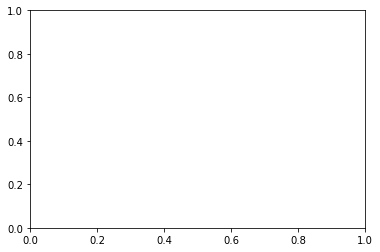

In [5]:
fig, ax = matplotlib.pyplot.subplots()

<br>That's actually the long version of the line. Remember that Matplotlib is a very large package, and that sometimes in Python there are standard nicknames that are used to import packages (pandas is commonly imported as pd, for example). You usually won't actually see people running `import matplotlib` in their notebooks. Instead, we import the `pyplot` library from the `matplotlib` package as `plt`. This is just common. Let's do it here:

In [3]:
import matplotlib.pyplot as plt

<br><br>Now our first line of code ("The Fundamental Line") for every plot is:

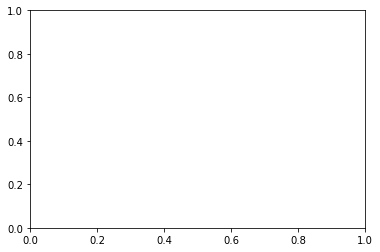

In [4]:
fig, ax = plt.subplots()

<br><br>All matplotlib plots have one **figure** and one or more **axes**.
<br><br>An **axes** in matplotlib is **NOT** the same thing as an **axis** on a plot (like the x-axis or y-axis).
<br><br>The **figure** is the whole visualization, and the **axes** is the individual plot inside the figure. I like to think about it like this: the *figure* is a wall where you're going to hang your pictures; the *axes* are the pictures you hang on the wall.
<br><br>You can have multiple axes in one figure. Here is an example of that:

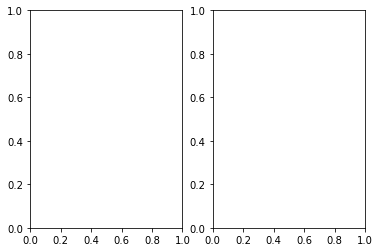

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=2)

<br><br>We can set some attributes of the **figure** inside the `plt.subplots()` function in this first line:

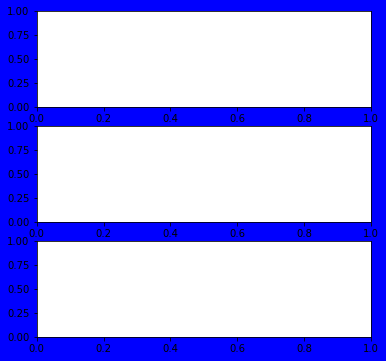

In [7]:
fig, ax = plt.subplots(nrows=3, figsize=(6,6), facecolor="blue")

### <br><br>**Exercise 1.**

In the next code cell, import pyplot as plt and use the magic function to set the Matplotlib backend as `inline`.

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In the next code cell, create a figure with four axes, two on the top row and two on the bottom. Make the figure size 4 inches wide by 4 inches high. It's ok if it looks crowded.

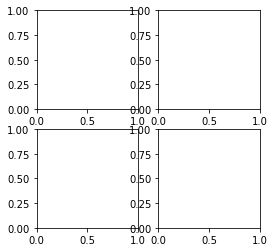

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(4,4))

<br><br>*A note about variable names:* We are defining the figure and axes as `fig` and `ax`. We could make up any variable names we want here, but `fig` and `ax` are most commonly used and you will see those used throughout the documentation for matplotlib as well as across the internet when you're searching for help online.

## <br><br>Customizing the look

Visualizations (which we often call plots or figures) have a lot of attributes in common, but all those attributes can be customized. Let's take a look at this example from Matplotlib:

![anatomy.png](https://matplotlib.org/_images/anatomy.png)

<br>In a few minutes, we'll get to actually plotting data. But first we'll talk about customizing the axes of our plots. We can see in the image above that many of the objects in our plot are attributes of our **axes**. Specifically, this is the `ax` object we create in our first line of code. 
<br><br>We can see `ax.legend`, `ax.grid`, and `ax.xaxis`. Some of these are actually method functions and need to be called with parentheses. Some are attributes that have their own attributes or methods, like `ax.xaxis.set_minor_formatter`. Sometimes it is hard to know (and remember) if we can change an attribute of `ax` by directly calling the attribute, by using it as a method function, or if we need to go to another level.

<br>Let's remind ourselves of what the basic axes looks like, and then start experimenting.

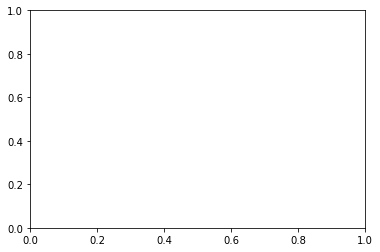

In [10]:
fig, ax = plt.subplots()

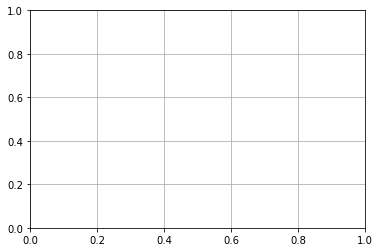

In [11]:
fig, ax = plt.subplots()
ax.grid()

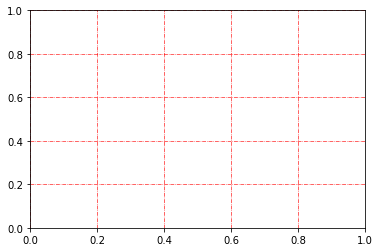

In [12]:
fig, ax = plt.subplots()
ax.grid(color='red', linestyle='-.', linewidth=0.6)

<br><br>Let's try and change the look of the x-axis the same way:

TypeError: 'XAxis' object is not callable

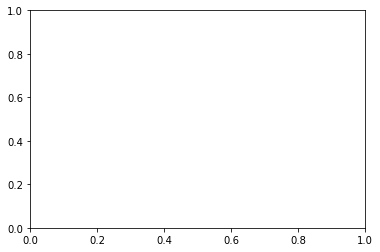

In [13]:
fig, ax = plt.subplots()
ax.xaxis(color='red', linestyle='-.', linewidth=0.6)

<br><br>Hmm. Let's use a "set" method to change only the color.

AttributeError: 'XAxis' object has no attribute 'set_color'

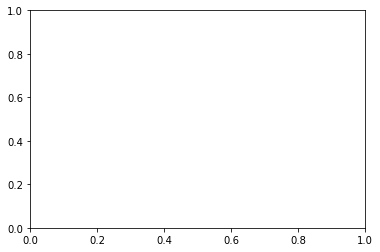

In [14]:
fig, ax = plt.subplots()
ax.xaxis.set_color("red")

<br> Hmm. That didn't work either.

### <br><br>**Exercise 2.**

Can you figure out how to change the color of the x-axis? Try looking up the answer online. Another clue might be found by looking back at the picture above, "Anatomy of a Figure". 
<br><br>Don't forget that you can only have one code cell per figure, so you'll need to include "The Fundamental Line".

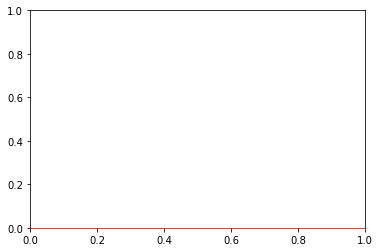

In [15]:
fig, ax = plt.subplots()
ax.spines['bottom'].set_color('red')

<br>If you figure out how to change the color, how about making the following changes: `color='red', linestyle='-.', linewidth=0.6`?

[None, None, None]

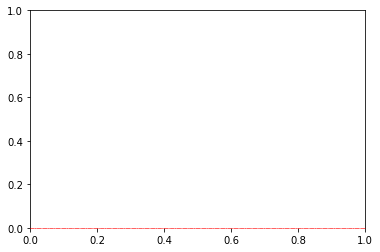

In [16]:
fig, ax = plt.subplots()
ax.spines['bottom'].set(color='red', linestyle='-.', linewidth=0.6)

### <br><br><br>Colors in Matplotlib

There are many different ways to specify colors in matplotlib:
<br>https://matplotlib.org/stable/gallery/color/color_demo.html

<br>You can use the following colors without needing to use any sort of prefix. You just put them in quotes, like we've been doing so far.

![sphx_glr_named_colors_003_2_0x.png](https://matplotlib.org/stable/_images/sphx_glr_named_colors_003_2_0x.png)

### <br><br><br>Multiple ways to get the same look

So ax.xaxis and ax.yaxis aren't for changing their appearances. They are used for changing the tick labels (as shown in the "Anatomy of a Figure" image). In matplotlib, it often takes some googling to remind yourself of the proper code for exactly what you want to customize, and there are often multiple ways to do it. To change the axis labels, for example, you could use two set methods on the axes:

Text(0, 0.5, 'Days since last Python error')

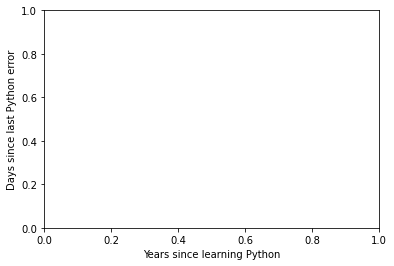

In [17]:
fig, ax = plt.subplots()
ax.set_xlabel("Years since learning Python")
ax.set_ylabel("Days since last Python error")

<br><br>OR you can set multiple attributes of the axes at the same time inside the `set()` method:

[Text(0.5, 0, 'Years since learning Python'),
 Text(0, 0.5, 'Days since last Python error'),
 (0.0, 10.0),
 (-1.0, 10.0)]

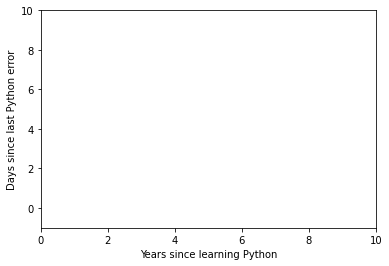

In [18]:
fig, ax = plt.subplots()
ax.set(xlabel="Years since learning Python", 
       ylabel="Days since last Python error", 
       xlim=(0,10),
       ylim=(-1,10))

### <br><br>**Exercise 3.**

Change the code below to add a `title` to the axes (you choose the title) and change the `facecolor` of the axes to any color you'd like.

[Text(0.5, 0, 'Years since learning Python'),
 Text(0, 0.5, 'Days since last Python error'),
 (0.0, 10.0),
 (-1.0, 10.0),
 Text(0.5, 1.0, 'Python Coding Progress'),
 None]

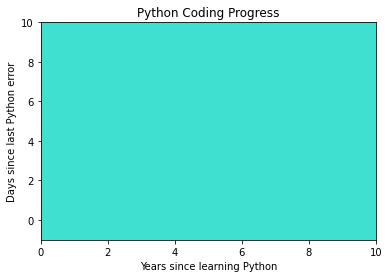

In [19]:
fig, ax = plt.subplots()
ax.set(xlabel="Years since learning Python", 
       ylabel="Days since last Python error", 
       xlim=(0,10),
       ylim=(-1,10),
       title="Python Coding Progress",
       facecolor="turquoise")

#### <br><br>Setting attributes with a dictionary

Here's why it's useful to have two ways to customize the look of your plots. You can save a dictionary of your perfect look and reuse it for multiple plots inside the `set()` method function. For example, if you're creating visualizations for a paper to be published in a particular journal, you can save one set of attributes and reuse it on all your plots so that they have a cohesive look. Then, if you need to change one attribute of only one plot, you can change it using the specific `set_` method.

<br>In the dictionary, the keywords from the matplotlib arguments are the keys, and must be stored as strings.

In [20]:
cool_ax = {"facecolor": "lightseagreen", 
           "xticks": (0, 1, 2, 3),
           "xticklabels": ("0", "Year 1", "Year 2", "Year 3")}
cool_fig = {"figsize": (3,1), "facecolor": "darkorange"}

<br> When you pass the dictionaries as arguments, you need to **unpack** them by putting `**` in front of the dictionary name:

[None,
 [Text(0, 0, '0'),
  Text(1, 0, 'Year 1'),
  Text(2, 0, 'Year 2'),
  Text(3, 0, 'Year 3')]]

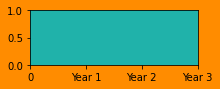

In [21]:
fig, ax = plt.subplots(**cool_fig)
ax.set(**cool_ax)

<br>Now we can use the dictionary, but still change some attributes afterwards:

[Text(0, 0, '0'),
 Text(1, 0, 'Year 2'),
 Text(2, 0, 'Year 4'),
 Text(3, 0, 'Year 6')]

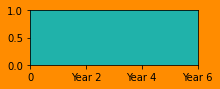

In [22]:
fig, ax = plt.subplots(**cool_fig)
ax.set(**cool_ax)
ax.set_xticklabels(("0", "Year 2", "Year 4", "Year 6"))

### <br><br><br>plt.show()

You'll notice that Jupyter might be printing out some extra info with every figure:

[Text(0.5, 0, 'Years since learning Python'),
 Text(0, 0.5, 'Days since last Python error'),
 (0.0, 10.0),
 (-1.0, 10.0)]

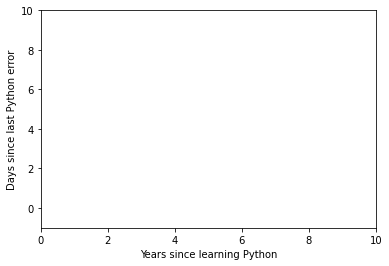

In [23]:
fig, ax = plt.subplots()
ax.set(xlabel="Years since learning Python", 
       ylabel="Days since last Python error", 
       xlim=(0,10),
       ylim=(-1,10))

<br>You can get rid of that extra stuff by explicitly **showing** the plot after you create it. You just add a line at the bottom of the cell: `plt.show()`.

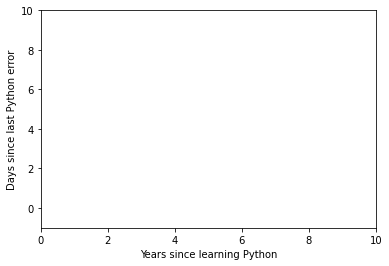

In [24]:
fig, ax = plt.subplots()
ax.set(xlabel="Years since learning Python", 
       ylabel="Days since last Python error", 
       xlim=(0,10),
       ylim=(-1,10))
plt.show()

### <br><br><br>Selecting an individual axes (ax?)

Sometimes you'll want different features for different **axes** in the same **figure**. For example, they might need different ranges for the x-axis and/or y-axis. As a reminder, here's how we create a figure with multiple axes:

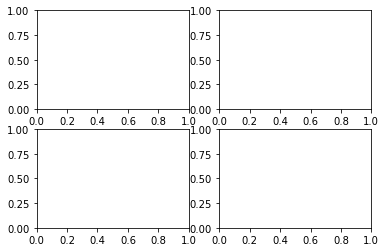

In [25]:
fig, ax = plt.subplots(ncols=2, nrows=2)
plt.show()

<br>We can index the `ax` object (like we would any Python object) to select an individual axes. First you index the row, then the column, separated by a comma:

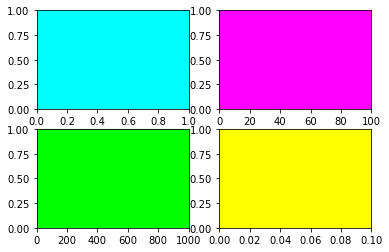

In [26]:
fig, ax = plt.subplots(ncols=2, nrows=2)
ax[0,0].set(facecolor="cyan", xlim=(0,1))
ax[0,1].set(facecolor="magenta", xlim=(0,100))
ax[1,0].set(facecolor="lime", xlim=(0,1000))
ax[1,1].set(facecolor="yellow", xlim=(0,0.1))
plt.show()

<br>When indexing an array of axes that only has one column or one row, you only need to index one number:

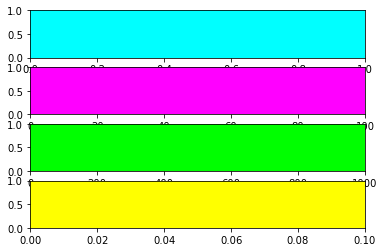

In [27]:
fig, ax = plt.subplots(ncols=1, nrows=4)
ax[0].set(facecolor="cyan", xlim=(0,1))
ax[1].set(facecolor="magenta", xlim=(0,100))
ax[2].set(facecolor="lime", xlim=(0,1000))
ax[3].set(facecolor="yellow", xlim=(0,0.1))
plt.show()

### <br><br>**Exercise 4.**

Change the code below so that each axes has a title. You can call them "Plot 1", "Plot 2", and "Plot 3":

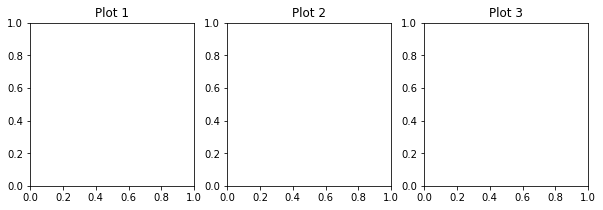

In [28]:
fig,ax = plt.subplots(ncols=3, figsize=(10,3))
ax[0].set_title("Plot 1")
ax[1].set(title="Plot 2")
ax[2].set_title("Plot 3")
plt.show()

## <br><br>Plotting data

### <br>Today's sample data

We will use Pandas to load and filter our data:

In [29]:
import pandas as pd

<br>**US Baby Names:** This data contains information about first names used in the US from 1965 to 2014. It contains the frequency and associated sex for all names given to newborns in the US in any given year -- conditional on the name being used at least 5 times in that year. It was downloaded from Kaggle by Antonio.

In [30]:
name_data_url = r'https://raw.githubusercontent.com/non87/Matplotlib-Workshop/master/data/national_reduced.csv'
names = pd.read_csv(name_data_url)

In [31]:
names.head()

,Unnamed: 0,Id,Name,Year,Gender,Count
0,633419,633420,Lisa,1965,F,60268
1,633420,633421,Mary,1965,F,34270
2,633421,633422,Karen,1965,F,32874
3,633422,633423,Kimberly,1965,F,28833
4,633423,633424,Susan,1965,F,26333


In [32]:
names.shape

(1192014, 6)

### <br>Selecting data with pandas

For each plot, we'll need to create an appropriate pandas dataframe or series object that contains the correct data to plot. Today is not a pandas workshop, but selecting data correctly in pandas is an important step. I'll include comments with the pandas code to explain what I'm doing, but we won't spend time on pandas.

### <br>Line chart (`ax.plot()`)

Let's start with a line chart that shows the popularity of the name "Taylor" over time. X-axis will be time (in years) and y-axis will be number of babies given that name each year.

In [33]:
#Only get rows for the name Taylor
#There will be two rows per year, one for M and one for F
taylor = names.loc[names["Name"] == "Taylor", :]
#Sum up the total M and F for each year
taylor = taylor.groupby(['Year']).sum()
#Year was being used as the INDEX for the dataframe...
#which isn't the same as a column...
#so we use this line to turn the index into a column
taylor.reset_index(inplace=True)
#Show us the first five rows of the new dataframe
taylor.head()

,Year,Unnamed: 0,Id,Count
0,1965,1282624,1282626,85
1,1966,1303297,1303299,100
2,1967,1327331,1327333,94
3,1968,1353142,1353144,146
4,1969,1378426,1378428,134


<br><br>To create a line chart, we use the method `ax.plot()`. We pass it two arguments, data for the x-axis (Year) and data for the y-axis (Count of babies named Taylor). We can also pass it additional keyword arguments if desired, such as the line color.

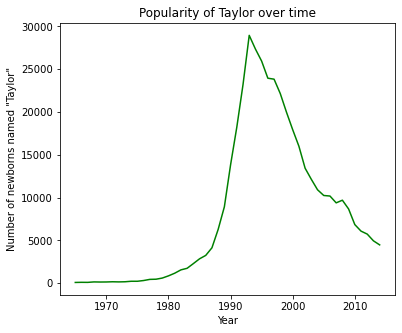

In [34]:
fig, ax = plt.subplots(figsize= (6,5))
ax.plot(taylor['Year'], taylor['Count'], color="green")
ax.set_title('Popularity of Taylor over time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Taylor"')
plt.show()

<br>That's a really steep rise!

### <br><br>**Exercise 5.**

Pick a name that you think had a really steep rise at some time between 1965 and 2014. Save that name as the variable `test_name` below, and then run the code cell to select the correct data in pandas:

In [40]:
test_name = "Addison"
test_df = names.loc[names["Name"] == test_name, :]
#Sum up the total M and F for each year
test_df = test_df.groupby(['Year']).sum()
test_df.reset_index(inplace=True)
test_df.head()

,Year,Unnamed: 0,Id,Count
0,1965,642408,642409,28
1,1966,654494,654495,26
2,1967,667218,667219,18
3,1968,680139,680140,16
4,1969,693120,693121,27


Write code below to create a line chart for your test name. It's ok to scroll up and copy off Taylor.

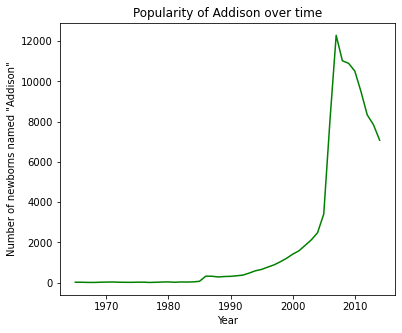

In [41]:
fig, ax = plt.subplots(figsize= (6,5))
ax.plot(test_df['Year'], test_df['Count'], color="green")
ax.set_title('Popularity of Addison over time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Addison"')
plt.show()

### <br><br>Line chart with two lines

We can add multiple lines to one axes. We will plot the popularity of the name Taylor for male and female babies.

In [42]:
#Only get rows for the name Taylor
#There will be two rows per year, one for M and one for F
taylor = names.loc[names["Name"] == "Taylor", :]
#Year was being used as the INDEX for the dataframe...
#which isn't the same as a column...
#so we use this line to turn the index into a column
taylor.reset_index(inplace=True)
#Create separate dataframes for M and F
taylor_M = taylor[taylor.Gender == "M"]
taylor_F = taylor[taylor.Gender == "F"]

<br>To add multiple lines, we just call `ax.plot` multiple times in the same code cell:

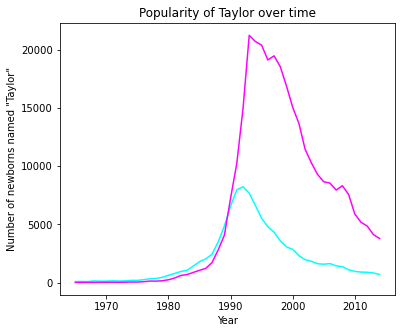

In [43]:
fig, ax = plt.subplots(figsize= (6,5))
ax.plot(taylor_M['Year'], taylor_M['Count'], color="cyan")
ax.plot(taylor_F['Year'], taylor_F['Count'], color="magenta")
ax.set_title('Popularity of Taylor over time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Taylor"')
plt.show()

<br>Let's add a legend. To match up the legend with our two lines, we need to add a label to each line:

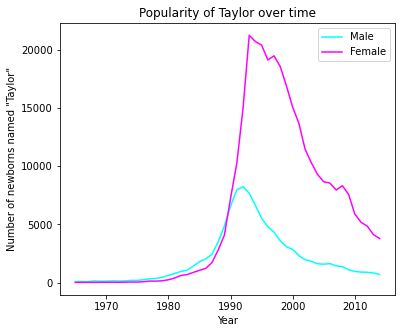

In [44]:
fig, ax = plt.subplots(figsize= (6,5))
ax.plot(taylor_M['Year'], taylor_M['Count'], color="cyan", label="Male")
ax.plot(taylor_F['Year'], taylor_F['Count'], color="magenta", label="Female")
ax.set_title('Popularity of Taylor over time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Taylor"')
ax.legend()
plt.show()

<br>To get even fancier, we can add a vertical line showing the year that Taylor Swift had her first number one hit:

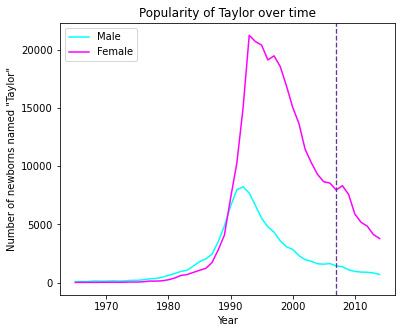

In [45]:
fig, ax = plt.subplots(figsize= (6,5))
ax.plot(taylor_M['Year'], taylor_M['Count'], color="cyan", label="Male")
ax.plot(taylor_F['Year'], taylor_F['Count'], color="magenta", label="Female")
ax.set_title('Popularity of Taylor over time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of newborns named "Taylor"')
ax.legend()
ax.axvline(x=2007, color="rebeccapurple", linewidth=1.3, linestyle="--")
plt.show()


### <br>Scatter plot (`ax.scatter()`)

Let's use a scatter plot to compare the popularity of Taylor and Logan over time.

Same pandas code we used before to collect Taylor data, but now with Logan:

In [46]:
#Only get rows for the name Logan
#There will be two rows per year, one for M and one for F
logan = names.loc[names["Name"] == "Logan", :]
#Sum up the total M and F for each year
logan = logan.groupby(['Year']).sum()
#Year was being used as the INDEX for the dataframe...
#which isn't the same as a column...
#so we use this line to turn the index into a column
logan.reset_index(inplace=True)
#Show us the first five rows of the new dataframe

In [47]:
#And we'll rerun the code for Taylor, in case we messed it up earlier.
taylor = names.loc[names["Name"] == "Taylor", :]
taylor = taylor.groupby(['Year']).sum()
taylor.reset_index(inplace=True)

<br>The code for a scatter plot is pretty similar to a line plot. We will use `ax.scatter()` and pass it our data for the x-axis and the y-axis.

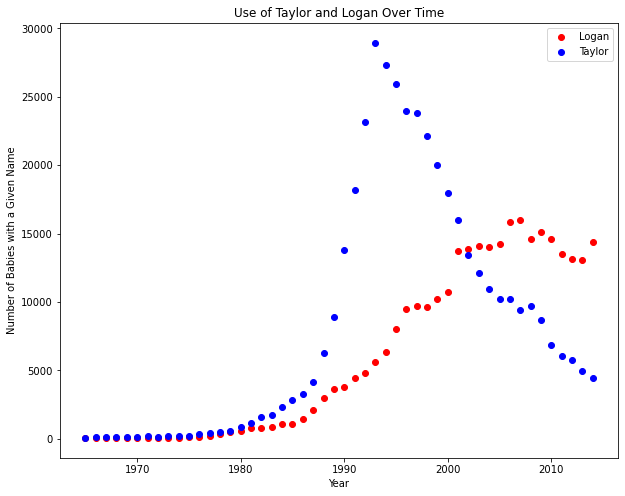

In [48]:
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Use of Taylor and Logan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.scatter(logan['Year'], logan['Count'], color = 'red', label = 'Logan')
ax.scatter(taylor['Year'], taylor['Count'], color = 'blue', label = 'Taylor')
ax.legend()
plt.show()

<br>With a scatter plot, we can also change the marker size and shape, in addition to the color:

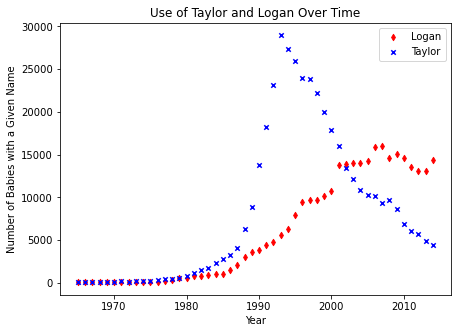

In [49]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Use of Taylor and Logan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.scatter(logan['Year'], logan['Count'], marker="d", s=20, c='red', label='Logan')
ax.scatter(taylor['Year'], taylor['Count'], marker="x", s=20, c='blue', label='Taylor')
ax.legend()
plt.show()

<br>For fun, let's add a vertical line for the year that Hugh Jackman first played the role of The Wolverine (Logan) in a movie:

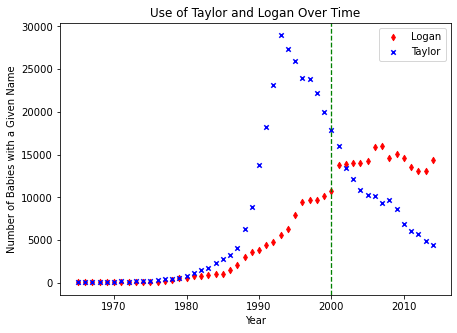

In [50]:
fig, ax = plt.subplots(figsize=(7,5))
ax.set_title('Use of Taylor and Logan Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Babies with a Given Name')
ax.scatter(logan['Year'], logan['Count'], marker="d", s=20, c='red', label='Logan')
ax.scatter(taylor['Year'], taylor['Count'], marker="x", s=20, c='blue', label='Taylor')
ax.legend()
ax.axvline(x=2000, color="green", linewidth=1.3, linestyle="--")
plt.show()

### <br>Histogram (`hist()`)

Let's use a histogram to see the popularity of all names given to male and female babies from 1965-2014. For each sex, we only need a pandas series object, not a whole dataframe, since we only need one column representing the total count for each name.

In [52]:
#Create pandas series that collects to total sum for each name
total_M = names[names.Gender == "M"].groupby("Name")["Count"].sum()
total_F = names[names.Gender == "F"].groupby("Name")["Count"].sum()
print(total_M)

Name
Aaban         72
Aabid          5
Aadam        196
Aadan        112
Aadarsh      158
            ... 
Zytavion       5
Zytavious     43
Zyvion         5
Zyyon          6
Zzyzx          5
Name: Count, Length: 35091, dtype: int64


<br>We'll create one figure with two plots:

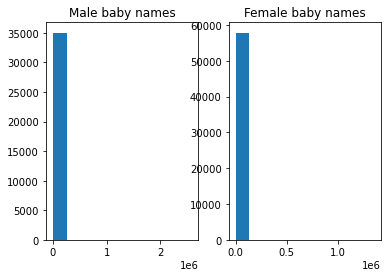

In [53]:
fig, ax = plt.subplots(1,2)
ax[0].hist(total_M)
ax[0].set_title("Male baby names")
ax[1].hist(total_F)
ax[1].set_title("Female baby names")
plt.show()

<br>That doesn't look good. Let's use a log scale for the y-axis. We can do that by changing the default keyword argument`log` in the `hist()` method from False to True:

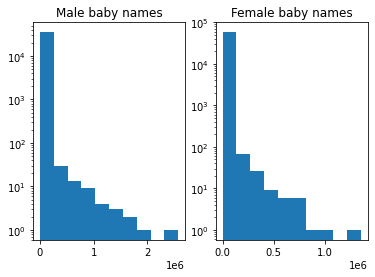

In [54]:
fig, ax = plt.subplots(1,2)
ax[0].hist(total_M, log=True)
ax[0].set_title("Male baby names")
ax[1].hist(total_F, log=True)
ax[1].set_title("Female baby names")
plt.show()

<br>These look pretty similar! Lots more uncommon baby names, and then fewer super popular baby names. Except for one thing... The scale of the xaxis is different. For males, it goes past 2 million, and for females if goes a little past 1 million. Let's plot them both on the same histogram this time instead of side-by-side:

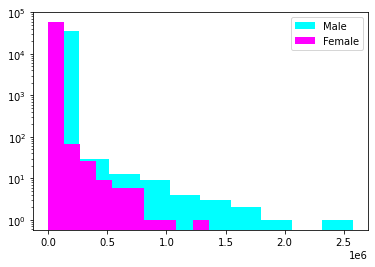

In [55]:
fig, ax = plt.subplots()
ax.hist(total_M, log=True, color="cyan", label="Male")
ax.hist(total_F, log=True, color="magenta", label="Female")
ax.legend()
plt.show()

Now we can see that more rare names are used for female babies, and more common names are used for male babies.

### <br><br>**Exercise 6.**

`alpha` is a a keyword argument that can adjust the transparency of a color. `alpha=1` is full color (100% opaque). Sometimes when layering multiple colors, you want to be able to see through to the color behind. Add the `alpha` keyword argument to the code below and try to find a good transparency level for this plot.

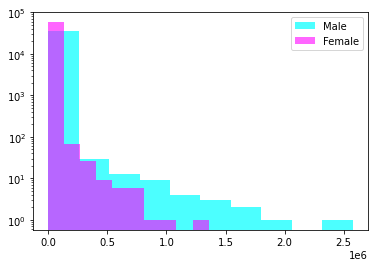

In [60]:
fig, ax = plt.subplots()
ax.hist(total_M, log=True, color="cyan", label="Male", alpha=.7)
ax.hist(total_F, log=True, color="magenta", label="Female", alpha=.6)
ax.legend()
plt.show()

### <br>Bar graph (`bar()` and `barh()`)

Let's compare the popularity of two names by decade. Our data ends in 2014, so our "decades" will be ten-year intervals that start halfway through each traditional decade.

In [62]:
name1 = "Jordan"
name2 = "Dylan"
#Create 4 dataframes, 1975-1985, 1985-1994, 1995-2004, and 2005-2014
df80 = names[(names.Year >= 1975) & (names.Year < 1985)]
df90 = names[(names.Year >= 1985) & (names.Year < 1995)]
df00 = names[(names.Year >= 1995) & (names.Year < 2005)]
df10 = names[(names.Year >= 2005) & (names.Year < 2015)]
#Create a list for each name with the total count of babies born...
#in each of the four decades
name1decades = [df80[df80.Name == name1]["Count"].sum(),
                df90[df90.Name == name1]["Count"].sum(), 
                df00[df00.Name == name1]["Count"].sum(),
                df10[df10.Name == name1]["Count"].sum()]
name2decades = [df80[df80.Name == name2]["Count"].sum(),
                df90[df90.Name == name2]["Count"].sum(), 
                df00[df00.Name == name2]["Count"].sum(),
                df10[df10.Name == name2]["Count"].sum()]
#Let's see what one of these lists looks like:
print(name1decades)

[23746, 155922, 184259, 107677]


<br>We also need to create a list for the x-axis - What do the items in our lists represent?

In [63]:
decades = ["1975-1985", "1985-1994", "1995-2004", "2005-2014"]

<br>We will plot these bar charts side-by-side:

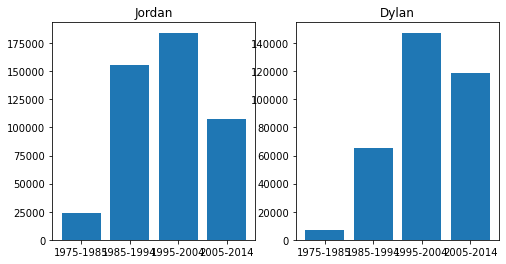

In [64]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4))
ax[0].bar(decades, name1decades)
ax[0].set_title(name1)
ax[1].bar(decades, name2decades)
ax[1].set_title(name2)
plt.show()

<br>It's hard to compare because they have different ranges for the y-axis. We can match up all the subplots by passing the keyword argument `sharey=True`:

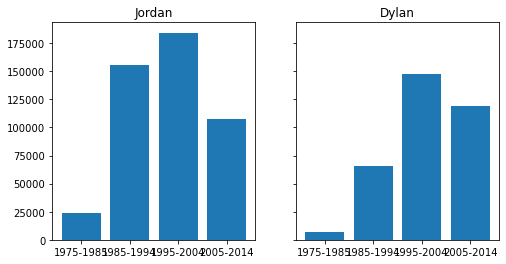

In [65]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].bar(decades, name1decades)
ax[0].set_title(name1)
ax[1].bar(decades, name2decades)
ax[1].set_title(name2)
plt.show()

<br>We can improve the look even more by removing the y-axis ticks from the plot on the right and by moving the two plots closer together using the function `fig.tight_layout()`:

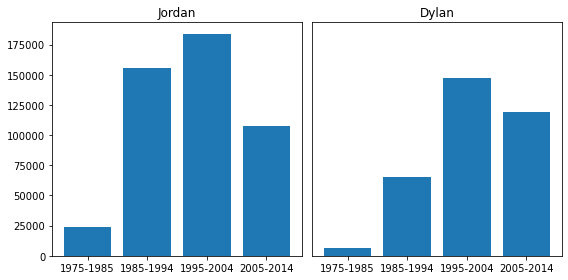

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8,4), sharey=True)
ax[0].bar(decades, name1decades)
ax[0].set_title(name1)
ax[1].bar(decades, name2decades)
ax[1].set_title(name2)
ax[1].yaxis.set_ticks_position('none') 
fig.tight_layout()
plt.show()

### <br><br>**Exercise 7.**

There is a second function for making a horizontal bar plot: `barh()`. Change the code below to create two horizontal bar plots instead of two vertical bar plots. You'll need to change the subplots to be one on top of each other instead of side-by-side. You'll also need to adjust the figure size, the shared axis, and other style code. See how much you can do!

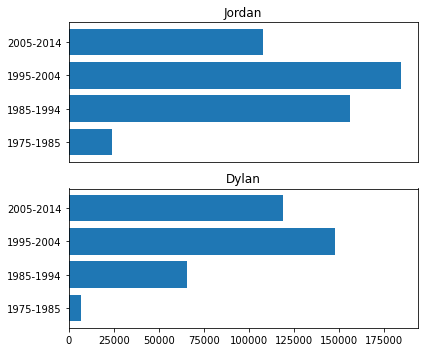

In [67]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6,5), sharex=True)
ax[0].barh(decades, name1decades)
ax[0].set_title(name1)
ax[1].barh(decades, name2decades)
ax[1].set_title(name2)
ax[0].xaxis.set_ticks_position('none') 
fig.tight_layout()
plt.show()

### <br><br> **Exercise 8.**

What happens if you plot both names on the same axes, instead of on two axes in the same figure? Can you write the code to try it?

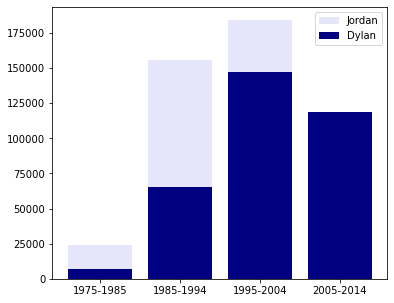

In [72]:
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(decades, name1decades, color="lavender", label=name1)
ax.bar(decades, name2decades, color="navy", label=name2)
ax.legend()
plt.show()

<br>Did it do what you expected? Can you adjust the colors and transparency to make it easier to read?

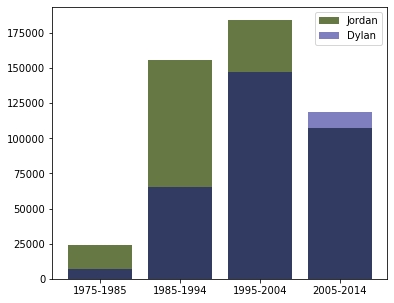

In [78]:
fig, ax = plt.subplots(figsize=(6,5))
ax.bar(decades, name1decades, color="darkolivegreen", label=name1, alpha=.9)
ax.bar(decades, name2decades, color="navy", label=name2, alpha=.5)
ax.legend()
plt.show()